In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files

In [32]:
import os
os.getcwd()


os.environ['KAGGLE_USERNAME'] = "krithi011" # username from the json file
os.environ['KAGGLE_KEY'] = "d3d31737af0a624d262f11427a92f9eb" # key from the json file
!kaggle competitions download -c instacart-market-basket-analysis # api copied from kaggle



 54% 17.0M/31.3M [00:00<00:00, 25.9MB/s]
100% 31.3M/31.3M [00:00<00:00, 70.7MB/s]
 72% 5.00M/6.90M [00:00<00:00, 7.93MB/s]
100% 6.90M/6.90M [00:00<00:00, 10.1MB/s]
  0% 0.00/795k [00:00<?, ?B/s]
100% 795k/795k [00:00<00:00, 113MB/s]
100% 157M/157M [00:01<00:00, 76.6MB/s]
100% 157M/157M [00:01<00:00, 90.6MB/s]
  0% 0.00/220k [00:00<?, ?B/s]
100% 220k/220k [00:00<00:00, 224MB/s]
  0% 0.00/804 [00:00<?, ?B/s]
100% 804/804 [00:00<00:00, 823kB/s]
  0% 0.00/1.87k [00:00<?, ?B/s]
100% 1.87k/1.87k [00:00<00:00, 1.86MB/s]


In [0]:
#Importing the essential libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
#The following library is imported for using the check_output function 
import subprocess
import zipfile
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [0]:
import pandas.util.testing as tm

In [34]:
file1 = '/content/order_products__train.csv.zip'

with zipfile.ZipFile(file1,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("order_products__train.csv") as f:
        order_pdts_train = pd.read_csv(f)

file2 = '/content/order_products__prior.csv.zip'

with zipfile.ZipFile(file2,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("order_products__prior.csv") as f:
        order_pdts_prior = pd.read_csv(f)
        
file3 = '/content/sample_submission.csv.zip'

with zipfile.ZipFile(file3,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("sample_submission.csv") as f:
        sample_sub = pd.read_csv(f)
        
file4 = '/content/products.csv.zip'

with zipfile.ZipFile(file4,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("products.csv") as f:
        products = pd.read_csv(f)
        
        
file5 = '/content/aisles.csv.zip'

with zipfile.ZipFile(file5,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("aisles.csv") as f:
        aisles = pd.read_csv(f)
        
file6 = '/content/departments.csv.zip'

with zipfile.ZipFile(file6,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("departments.csv") as f:
        departments = pd.read_csv(f)
        
file7 = '/content/orders.csv.zip'

with zipfile.ZipFile(file7,"r") as z:
# this will print a list of file names in the zip file
    print(z.namelist())

# open the file that you want from that list
    with z.open("orders.csv") as f:
        orders = pd.read_csv(f)
     

['order_products__train.csv', '__MACOSX/', '__MACOSX/._order_products__train.csv']
['order_products__prior.csv', '__MACOSX/', '__MACOSX/._order_products__prior.csv']
['sample_submission.csv']
['products.csv', '__MACOSX/', '__MACOSX/._products.csv']
['aisles.csv', '__MACOSX/', '__MACOSX/._aisles.csv']
['departments.csv', '__MACOSX/', '__MACOSX/._departments.csv']
['orders.csv', '__MACOSX/', '__MACOSX/._orders.csv']


In [0]:
order_pdts_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
order_pdts_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [35]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

### Q1: How many customers are present in each of these evaluation sets?

In [0]:
orders.groupby('eval_set').agg({'user_id' : lambda x: x.nunique()})

,user_id
eval_set,
prior,206209
test,75000
train,131209


### Q2. What is the distribution of the maximum number of orders of all customers?

In [0]:
orders_per_user = orders.groupby('user_id').agg({'order_number' : ['max']}).rename(columns = {'order_number' : 'orders_per_user'})
orders_per_user.columns = orders_per_user.columns.get_level_values(0)
#Number of times each max value occurs in the above dataframe 
n_orders = orders_per_user.orders_per_user.value_counts()

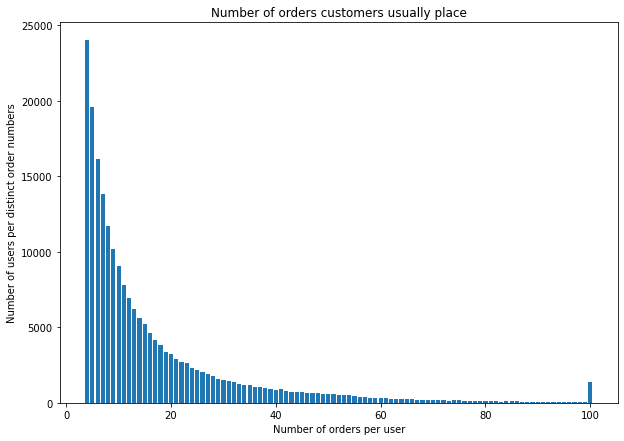

In [0]:
plt.figure(figsize = (10,7))
plt.bar(n_orders.index, n_orders.values)
plt.xlabel('Number of orders per user')
plt.ylabel('Number of users per distinct order numbers')
plt.title('Number of orders customers usually place');

In [0]:
orders_per_user['orders_per_user'].quantile(0.5)  #Median number of order quantity across all customers

10.0

#### Observations about the data:
1) order_pdts_prior and order_pdts_train datasets have the same structure. However, the orders of the customer are split into train, test and prior sets which is evident from the orders dataset.

2) All prior orders of customers are present in order_pdts_prior dataset and the most recent order has been split into training and test sets for our prediction. To identify if a record in test, train or prior, there is an indicator column in the orders dataset

3) The number of unique customers in the prior, train and test sets have been identified

4) Majority of the customers place a maximum of 10 orders (median number of orders)

### Q3. Which day of the week has the maximum number of reorders?

Since order_pdts_prior and order_pdts_train have the same structure, we are concatenating them into one for further analysis.

In [0]:
ordered_pdts_all = pd.concat([order_pdts_prior,order_pdts_train], axis = 0)
ordered_pdts_all.shape

(33819106, 4)

In [40]:
# Merge ordered_pdts with orders to get a pic of reorder and day of week relationship
merged_order = pd.merge(ordered_pdts_all, orders, on = "order_id", how = 'left')
merged_order.shape
merged_order.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [0]:
norders_dow = merged_order_dow[['order_dow','order_id']].groupby('order_dow')['order_id'].count().\
                reset_index(name='num_orders').sort_values(['num_orders'],ascending = False)

norders_dow

n_reorders_dow = merged_order_dow[merged_order_dow['eval_set'].isin(['prior', 'train']) & \
                                  merged_order_dow['reordered'] == 1].\
                groupby('order_dow')['reordered'].\
                sum().reset_index(name = 'num_orders').sort_values(['num_orders'],ascending = False)

n_reorders_dow

,order_dow,num_orders
0,0,3831900
1,1,3544661
6,6,2708008
5,5,2613888
2,2,2582006
3,3,2344277
4,4,2330620


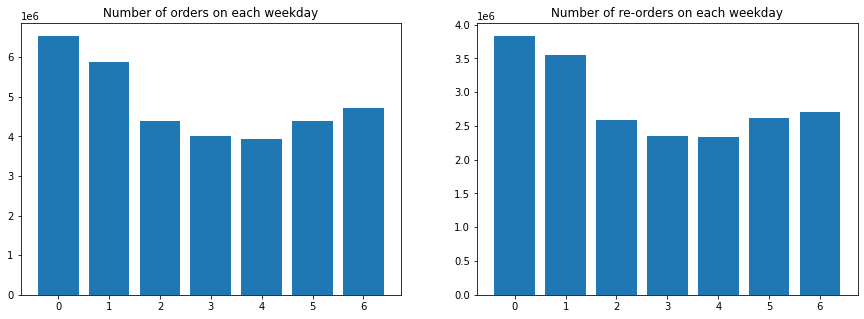

In [0]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax[0].bar('order_dow' , 'num_orders' ,data = norders_dow)
ax[1].bar('order_dow' , 'num_orders' ,data = n_reorders_dow)
ax[0].set_title('Number of orders on each weekday')
ax[1].set_title('Number of re-orders on each weekday');

### Observation

Assuming Day0 as Saturday, we see that the number of orders as well as number of re-orders are very high on Saturday and Sunday while it is the lowest on Wednesday. This might be an important factor for modelling the probability of an item re-order.

### Q4. What hour of the day has the highest orders and reorders?


In [0]:
norders_hod = merged_order_dow[['order_hour_of_day','order_id']].groupby('order_hour_of_day')['order_id'].count().\
                reset_index(name='num_orders').sort_values(['num_orders'],ascending = False)



n_reorders_hod = merged_order_dow[merged_order_dow['eval_set'].isin(['prior', 'train']) & \
                                  merged_order_dow['reordered'] == 1].\
                groupby('order_hour_of_day')['reordered'].\
                sum().reset_index(name = 'num_reorders').sort_values(['num_reorders'],ascending = False)

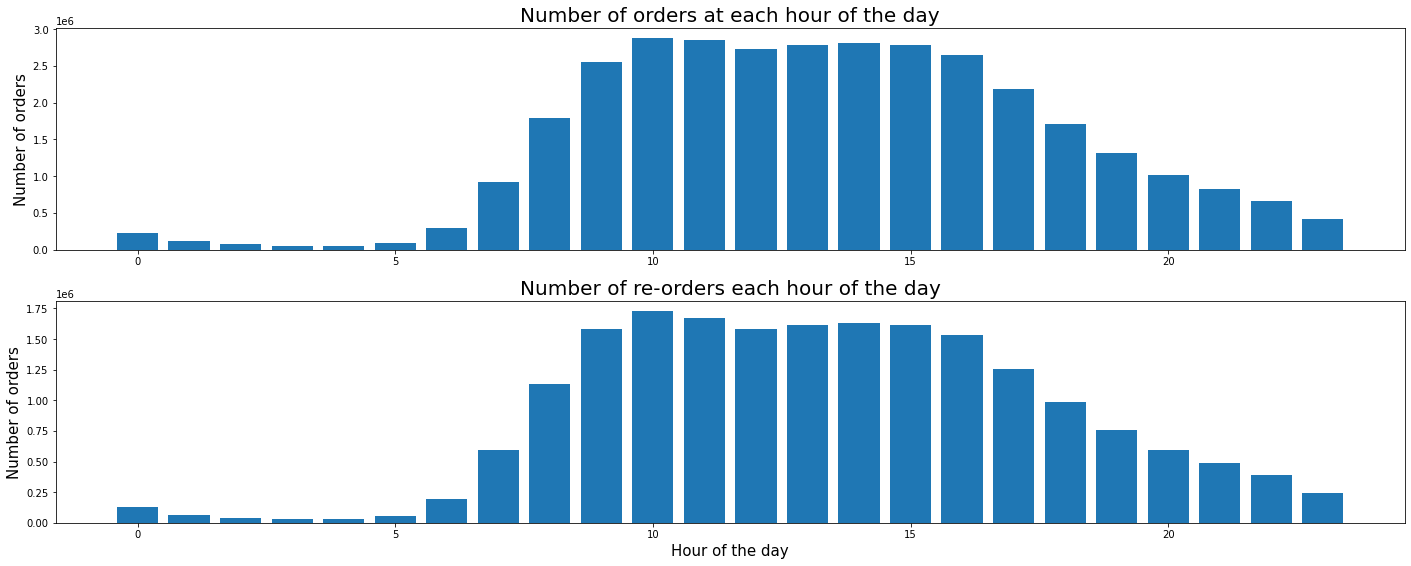

In [0]:

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 8))
fig.tight_layout(pad=3.0)
ax[0].bar('order_hour_of_day' , 'num_orders' ,data = norders_hod)
ax[1].bar('order_hour_of_day' , 'num_reorders' ,data = n_reorders_hod)
ax[0].set_ylabel('Number of orders',fontsize=15)
ax[1].set_ylabel('Number of orders', fontsize=15)
ax[1].set_xlabel('Hour of the day', fontsize=15)
ax[0].set_title('Number of orders at each hour of the day', fontsize = 20)
ax[1].set_title('Number of re-orders each hour of the day', fontsize = 20);

### Observation
Between 10AM and 3PM the orders are high. During early hours from midnight till 5AM, the number of orders placed are less.

In [0]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [37]:
ordered_pdts_all = pd.concat([order_pdts_prior,order_pdts_train], axis = 0)
ordered_pdts_all.shape

(33819106, 4)

In [38]:
ordered_pdts_all.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### Q5. Does the order in which the items are added to cart have an impact on the item re-purchase?

In [0]:
#merged_order.add_to_cart_order.nunique()
#add_to_cart_order has totally 145 unique entries

n_reorders_cart = merged_order[merged_order['eval_set'].isin(['prior', 'train']) & \
                                  merged_order['reordered'] == 1].\
                groupby('add_to_cart_order')['reordered'].\
                sum().reset_index(name = 'num_reorders').sort_values(['num_reorders'],ascending = False).\
                nlargest(40, 'num_reorders')

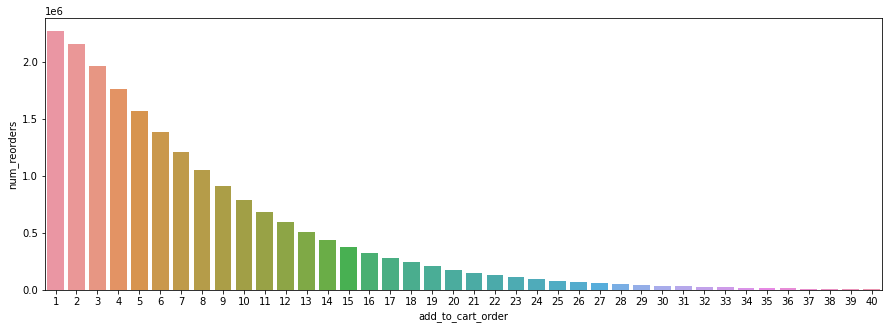

In [42]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'add_to_cart_order', y = 'num_reorders', data = n_reorders_cart);

### Observation
The interesting pattern we observe here is that the items that are added first to the cart are often always reordered by the customers.

This pattern slowly fades for the items added to cart later in time.

Next let's see what is the top 10 frequently reordered products and their departments.

In [43]:
merged_order.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [0]:
#merged_order[['product_id', 'days_since_prior_order', 'reordered', 'eval_set']].head()

pdts_days_prior_order = merged_order[['product_id', 'days_since_prior_order', 'reordered', 'eval_set']].\
    loc[merged_order['eval_set'].isin(['train','prior'])]

In [0]:
freq_ordered_pdts = pdts_days_prior_order.groupby('product_id')['days_since_prior_order'].mean().\
    reset_index(name = 'mean_days_since_prior_order').sort_values(['mean_days_since_prior_order'])#.\
                #nsmallest(100, 'mean_days_since_prior_order')

merged_pdts_gp1 = pd.merge(freq_ordered_pdts, products, on = 'product_id', how = 'left').merge(departments, on = 'department_id', how = 'left')



In [46]:
merged_pdts_gp1.shape
merged_pdts_gp1.product_id.nunique()

49685

In [47]:
products.shape

(49688, 4)

### Observation
Here's a key observation that the product_id in products table do not match with the number of product_ids in the merged orders table.

It seems that some products have never been ordered.

Hence in the test data in future, if we come across such unordered products, we might have sufficient information to predict their probability of purchase.

In [48]:
# Find product_ids that have never been ordered

set(products.product_id).symmetric_difference(merged_order.product_id)
#order_pdts_train[order_pdts_train['product_id'].isin([3630, 7045, 46625])]

{3630, 7045, 46625}

In [49]:
#Find what department these products belong to
products.head()
products[products['product_id'].isin([3630, 7045, 46625])].\
    merge(departments, on = 'department_id', how = 'inner', indicator=False)

,product_id,product_name,aisle_id,department_id,department
0,3630,Protein Granola Apple Crisp,57,14,breakfast
1,7045,Unpeeled Apricot Halves in Heavy Syrup,88,13,pantry
2,46625,Single Barrel Kentucky Straight Bourbon Whiskey,31,7,beverages


One or more of the products in the 'breakfast', 'pantry' and 'beverages' have no order history. Now, coming back to the most frequently ordered/re-ordered products.

In [0]:
merged_pdts_gp1['mean_days_since_prior_order'] = merged_pdts_gp1['mean_days_since_prior_order'].apply(np.ceil)

order_interval = merged_pdts_gp1.groupby('mean_days_since_prior_order').agg({'product_id': 'nunique'}).reset_index(drop = False)

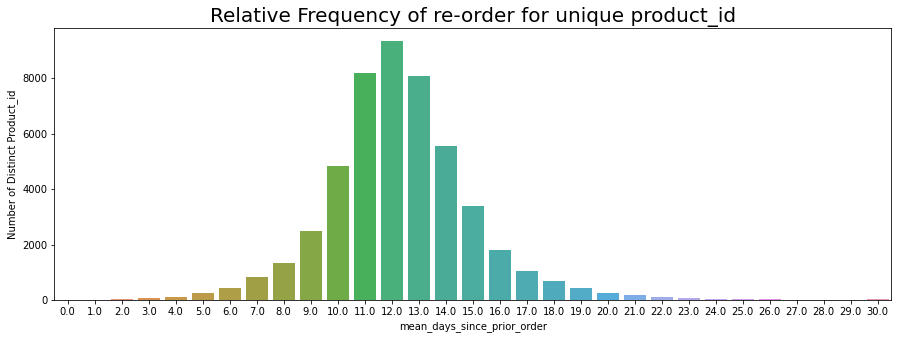

In [51]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'mean_days_since_prior_order' , y = 'product_id', data = order_interval)
plt.title('Relative Frequency of re-order for unique product_id', fontsize = 20)
plt.ylabel('Number of Distinct Product_id');

### Observation:

We see that on an average, the maximum number of unique products are getting reordered on the 12th day from the previous order.


In [0]:
pdt_names_reordered = merged_pdts_gp1[merged_pdts_gp1.mean_days_since_prior_order <= 12.000].groupby(['mean_days_since_prior_order']).\
    agg({'product_name': 'unique', 'department_id' : 'unique', 'department' : 'unique'}).reset_index(drop = False)

In [53]:
pdt_names_reordered[pdt_names_reordered['mean_days_since_prior_order'] <= 7.000 ]

,mean_days_since_prior_order,product_name,department_id,department
0,0.0,"[Organic Veggie Ground, Amaretto Almond Crunch...","[20, 1, 7]","[deli, frozen, beverages]"
1,1.0,"[Pomegranate Energy Shot, Black Olive Spread, ...","[7, 13, 5]","[beverages, pantry, alcohol]"
2,2.0,"[Ear Relief Ear Drops, Iced Green Tea Zero Cal...","[11, 7, 13, 1, 19, 17, 21, 9, 6, 5, 8, 2]","[personal care, beverages, pantry, frozen, sna..."
3,3.0,"[Strawman Farmhouse Hard Cider, Hickory Smokin...","[5, 19, 11, 8, 21, 1, 13, 17, 7, 3, 16, 6, 20,...","[alcohol, snacks, personal care, pets, missing..."
4,4.0,"[Quercetin 500 Mg, Clams, Whole Cooked & Farm ...","[11, 1, 19, 13, 9, 12, 2, 17, 5, 18, 20, 7, 6,...","[personal care, frozen, snacks, pantry, dry go..."
5,5.0,"[Terry Scouring Cloth, Dark 83% Pure Dark Choc...","[17, 19, 5, 4, 1, 2, 21, 13, 11, 3, 20, 7, 12,...","[household, snacks, alcohol, produce, frozen, ..."
6,6.0,"[Raspberry Vinaigrette Salad Snax, Organic Euc...","[19, 2, 21, 11, 13, 1, 17, 7, 3, 15, 5, 18, 16...","[snacks, other, missing, personal care, pantry..."
7,7.0,"[Baking & Drinking Wondercocoa, Rose Absolute ...","[7, 17, 6, 13, 11, 18, 5, 16, 9, 19, 3, 15, 21...","[beverages, household, international, pantry, ..."


In [0]:

list_of_departments = pdt_names_reordered['department'].to_list()
flat_list = [item for sublist in list_of_departments for item in sublist]

### Which departments have highest number of orders?

#### WordCloud

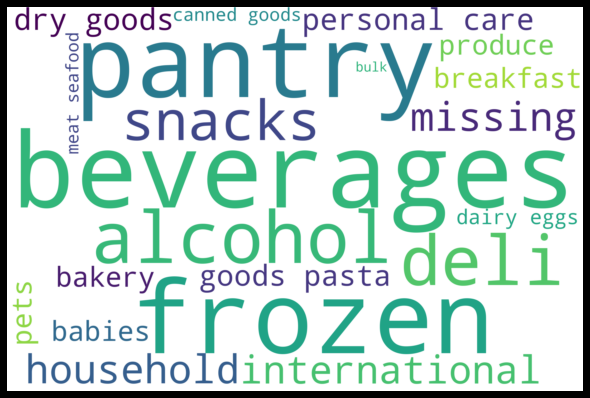

In [56]:
from wordcloud import WordCloud,STOPWORDS
text = (" ").join(flat_list)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (8, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observations

Reorders are more frequent for departments like beverages, snacks, pantry, alcohol and frozen.

### Q6. What products are getting reordered?

In [0]:
ordered_pdts_merge_gp2 = ordered_pdts_all.merge(products, on = 'product_id', how = 'left').\
                            merge(aisles, on = 'aisle_id', how = 'left')

In [58]:
ordered_pdts_merge_gp2.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [59]:
ordered_pdts_merge_gp2[ordered_pdts_merge_gp2['reordered'] == 1].groupby('product_name')['reordered'].sum()

product_name
#2 Coffee Filters                                                  265
#2 Cone White Coffee Filters                                         3
#4 Natural Brown Coffee Filters                                     90
& Go! Hazelnut Spread + Pretzel Sticks                              93
(70% Juice!) Mountain Raspberry Juice Squeeze                       16
                                                                  ... 
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum     17
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum           20
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum              34
with a Splash of Mango Coconut Water                                 7
with a Splash of Pineapple Coconut Water                            26
Name: reordered, Length: 45603, dtype: int64

In [0]:
freq_reordered_pdts = ordered_pdts_merge_gp2[ordered_pdts_merge_gp2['reordered'] == 1]['product_name'].value_counts().\
                        reset_index(name = 'num_reorders').sort_values(['num_reorders'],ascending = False).\
                        nlargest(20, 'num_reorders')

In [61]:
freq_reordered_pdts

,index,num_reorders
0,Banana,415166
1,Bag of Organic Bananas,329275
2,Organic Strawberries,214448
3,Organic Baby Spinach,194939
4,Organic Hass Avocado,176173
5,Organic Avocado,140270
6,Organic Whole Milk,118684
7,Large Lemon,112178
8,Organic Raspberries,109688
9,Strawberries,104588


### Observation
The most frequently reordered products are fruits and organic vegetables. 

In [0]:
pdt_list = merged_pdts_gp1.groupby('mean_days_since_prior_order')['product_name'].unique().reset_index()

list_of_pdts = pdt_list['product_name'].to_list()
flat_pdt_list = [item for sublist in list_of_pdts for item in sublist]

## Modelling

Now that we had a glimpse of the data and the factors influencing the reorder of a product, let's begin modelling. 

In [63]:
## Missing value investigation

def missing_data(df):
    x = ['column_name','missing_value_count', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data) 
    
#missing_data(ordered_pdts_all)
missing_data(orders)

              column_name missing_value_count  missing_in_percentage
0                order_id                   0               0.000000
1                 user_id                   0               0.000000
2                eval_set                   0               0.000000
3            order_number                   0               0.000000
4               order_dow                   0               0.000000
5       order_hour_of_day                   0               0.000000
6  days_since_prior_order              206209               6.027594


No missing values found. In the orders dataframe, wherever days_since_prior_order is NaN, we substitute 0. This is because we assume the the particular NaN records belong to a first-time order.

In [65]:
orders.fillna(0, inplace = True)
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [0]:

train_df = orders[orders['eval_set'].isin(['train','prior'])].merge(ordered_pdts_all, on = 'order_id', how = 'inner')

In [0]:
train_df = train_df.drop(['eval_set'], axis = 1)

Next, we are going to do some feature engineering to identify what's the reorder rate for every product_id in general and the reorder rate of a product given a user_id.

For example, consider a product_id corresponding to 'chocolate' and an arbitary user_id '1000'. 

**pdt_reorder_rate** will be the proportion of the total orders where chocolate is reordered.

In [0]:

# get product reorder_rate = reordersTotal / ordersTotal
products_temp = pd.DataFrame()

products_temp['orders_Total'] = train_df.groupby('product_id').size().astype(np.int32)

products_temp['reorders_Total'] = train_df['reordered'].groupby(train_df.product_id).sum().astype(np.float32)

products_temp['pdt_reorder_rate'] = (products_temp.reorders_Total / products_temp.orders_Total).astype(np.float32)

train = train_df.join(products_temp, on = 'product_id')


In [69]:
train = train.drop(columns = ['orders_Total', 'reorders_Total'], axis = 1)
train.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,pdt_reorder_rate
0,2539329,1,1,2,8,0.0,196,1,0,0.777843
1,2539329,1,1,2,8,0.0,14084,2,0,0.811336
2,2539329,1,1,2,8,0.0,12427,3,0,0.740182
3,2539329,1,1,2,8,0.0,26088,4,0,0.540429
4,2539329,1,1,2,8,0.0,26405,5,0,0.453374


In [0]:
X = train.loc[:, train.columns != 'reordered']
y = train.loc[:,'reordered']

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, ytest = train_test_split(X, y, test_size=0.30, random_state=5)

# Logistic Regression

Let's quickly try a Logistic Regression model on the training and assess the accuracy on test data.

In [74]:
#Logistic Regression model
logreg=(LogisticRegression(C=0.01))
logreg.fit(X_train, y_train)
#predictions
pred=logreg.predict(X_test)
#accuracy score of Logistic Regression Model
print(accuracy_score(logreg.predict(X_test), ytest))

0.5900447597078259


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

#Gradient Boosting Classifier
GBclass= GradientBoostingClassifier()

#fitting
GBclass.fit(X_train, y_train)
#predictions
GBpred = GBclass.predict(X_test)

#accuracy score for Gradient Boosting Classifier
accuracy_score(GBpred, ytest)


In [0]:
cust_clus = train.merge(departments, on = 'product_id', how = 'left')

In [0]:
cust_prod = pd.crosstab(train['user_id'], train['aisle'])
cust_prod.head(10)